Create 256 cellular automata displays to fit in a widget 128x128 px with transparent background and objects colored `RGBA(e0f7faff)`

[The Nature of Code](https://natureofcode.com/book/chapter-7-cellular-automata/)

---

In [1]:
# https://ipython-books.github.io/122-simulating-an-elementary-cellular-automaton/

import numpy as np
import drawSvg as draw
fill_color = "#e0f7fa"

u = np.array([[4], [2], [1]])

In [2]:
def step(x, rule_b):
    """Compute a single step of an elementary cellular
    automaton."""
    
    # The columns contains the L, C, R values
    # of all cells.
    y = np.vstack((np.roll(x, 1), x,
                   np.roll(x, -1))).astype(np.int8)
    
    # We get the LCR pattern numbers between 0 and 7.
    z = np.sum(y * u, axis=0).astype(np.int8)
    
    # We get the patterns given by the rule.
    return rule_b[7 - z]

In [3]:
def generate(rule, size=128, steps=128):
    """Simulate an elementary cellular automaton given
    its rule (number between 0 and 255)."""
    
    # Compute the binary representation of the rule.
    rule_b = np.array(
        [int(_) for _ in np.binary_repr(rule, 8)],
        dtype=np.int8)
    x = np.zeros((steps, size), dtype=np.int8)
    
    # Random initial state.
    x[0, :] = np.random.rand(size) < .5
    
    # Apply the step function iteratively.
    for i in range(steps - 1):
        x[i + 1, :] = step(x[i, :], rule_b)
    return x

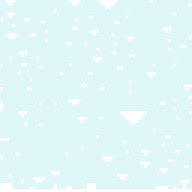

In [4]:
num_pix = 128 // 2
d = draw.Drawing(num_pix, num_pix)
d.setPixelScale(3)

automata_array = generate(30)
for i in range(num_pix):
    # Add a row
    for j in range(num_pix):
        # Add left to right
        if automata_array[i][j] == 1:
            # Flip on horizontal axis because origin is in the bottom left
            d.draw(draw.Rectangle(j, num_pix - i, 2, 2, fill=fill_color))

d.rasterize()

In [5]:
def saveSvg(rule, size= 128):
    d = draw.Drawing(size, size, draw_inline=False)
    automata_array = generate(rule)
    for i in range(num_pix):
        # Add a row
        for j in range(num_pix):
            # Add left to right
            if automata_array[i][j] == 1:
                # Flip on horizontal axis because origin is in the bottom left
                d.draw(draw.Rectangle(j, 128 - i, 1, 1, fill=fill_color))
    
    d.saveSvg("rule-" + str(rule) + "-ea.svg")

In [6]:
128 / 4

32.0

In [7]:
for i in range(256):
    saveSvg(i)

KeyboardInterrupt: 